<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/KC_Housing_Prices_EDA_and_Linear_Models_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Install
install.packages("wesanderson")
# Load
library(wesanderson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Import dataset KC Housing prices (From local computer)

downloaded from Kaggle: https://www.kaggle.com/vallabhadattap/kingcountyhousing?select=KC_housing_data.csv

In [5]:
link <- '/content/KC_housing_data.csv'

house_prices <- read.csv(link)

str(house_prices)

'data.frame':	4600 obs. of  18 variables:
 $ date         : chr  "2014-05-02 00:00:00" "2014-05-02 00:00:00" "2014-05-02 00:00:00" "2014-05-02 00:00:00" ...
 $ price        : num  313000 2384000 342000 420000 550000 ...
 $ bedrooms     : num  3 5 3 3 4 2 2 4 3 4 ...
 $ bathrooms    : num  1.5 2.5 2 2.25 2.5 1 2 2.5 2.5 2 ...
 $ sqft_living  : int  1340 3650 1930 2000 1940 880 1350 2710 2430 1520 ...
 $ sqft_lot     : int  7912 9050 11947 8030 10500 6380 2560 35868 88426 6200 ...
 $ floors       : num  1.5 2 1 1 1 1 1 2 1 1.5 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 4 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 5 4 4 4 3 3 3 4 3 ...
 $ sqft_above   : int  1340 3370 1930 1000 1140 880 1350 2710 1570 1520 ...
 $ sqft_basement: int  0 280 0 1000 800 0 0 0 860 0 ...
 $ yr_built     : int  1955 1921 1966 1963 1976 1938 1976 1989 1985 1945 ...
 $ yr_renovated : int  2005 0 0 0 1992 1994 0 0 0 2010 ...
 $ street       : chr  "18810 Densmore Ave N" "709 W Bla

# EDA 

## Histogram of prices

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



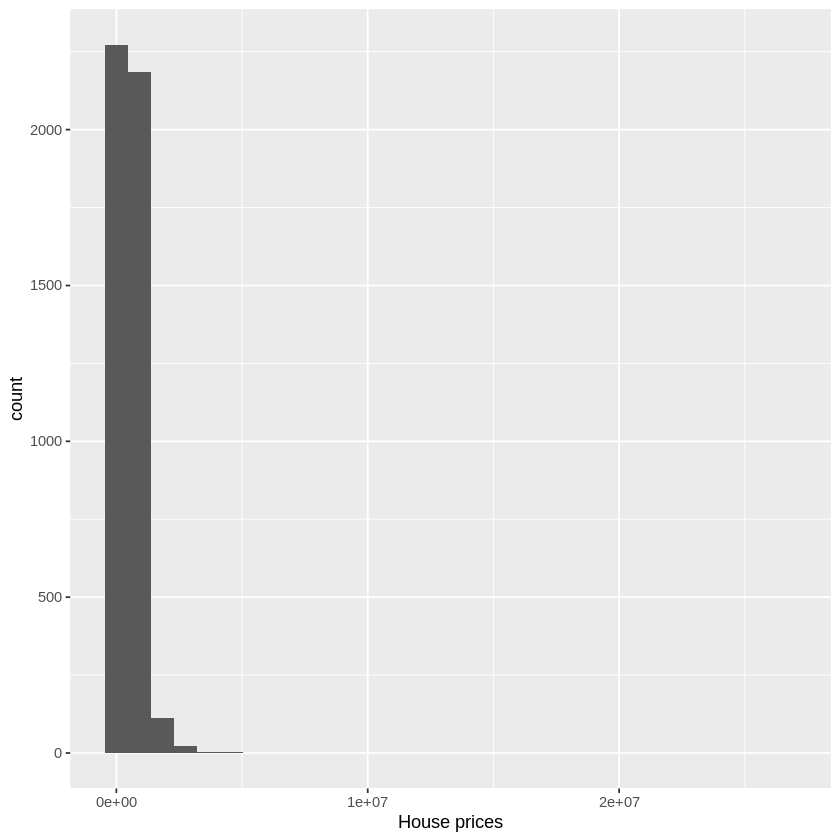

In [6]:
# Plot Histogram of prices
ggplot(house_prices, aes(x= price))+
  geom_histogram() + 
  labs(x='House prices')


As expected prices distribution are severely right skewed. Therefore we should compute log of prices:

## Histogram of prices (log axis)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 49 rows containing non-finite values (stat_bin).”


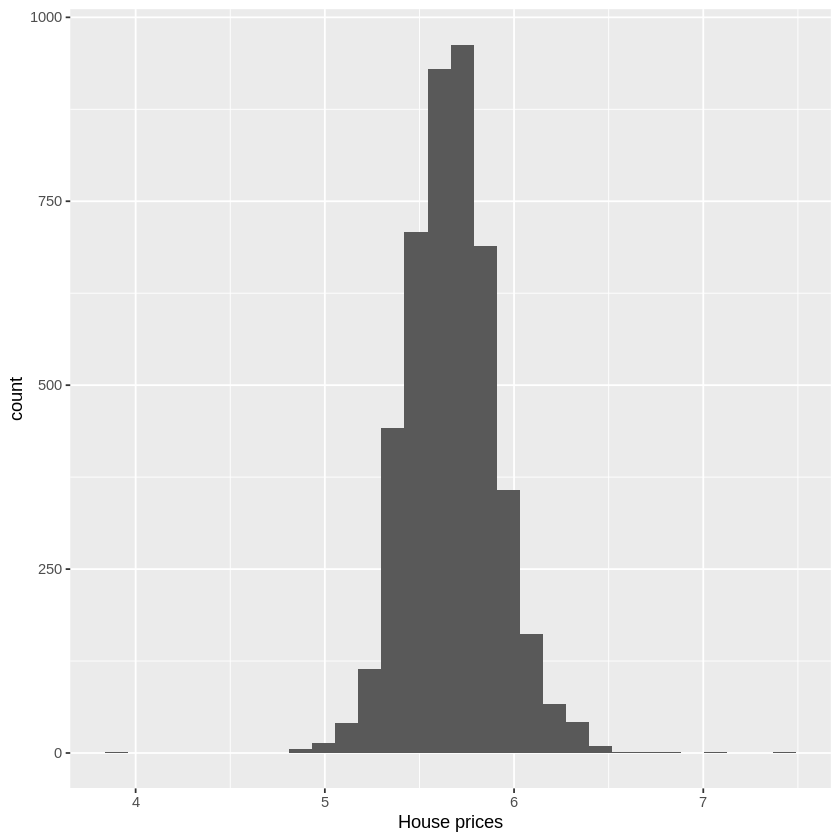

In [7]:
# Create a new feature log_price
house_prices <- house_prices %>%
  mutate(log_price = log10(price))

# Plot Histogram of prices
ggplot(house_prices, aes(x= log_price))+
  geom_histogram() + 
  labs(x='House prices')

## Histogram of sqft_living

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



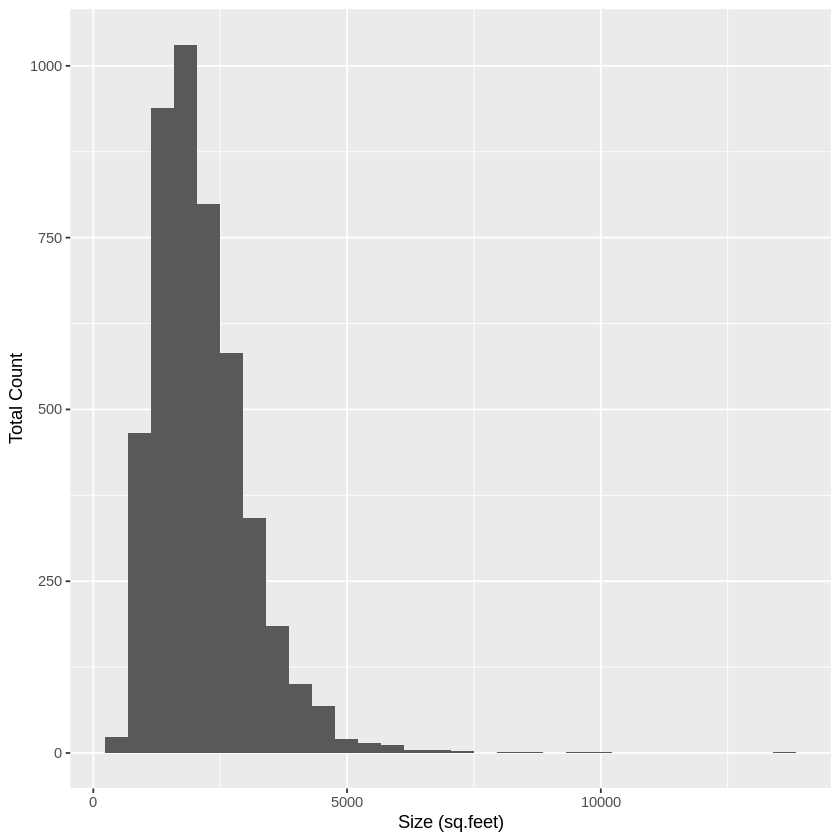

In [8]:
# Plot Histogram of prices
ggplot(house_prices, aes(x= sqft_living))+
  geom_histogram() + 
  labs(x='Size (sq.feet)', y= 'Total Count')

## Histogram of sqft_living (log axis)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



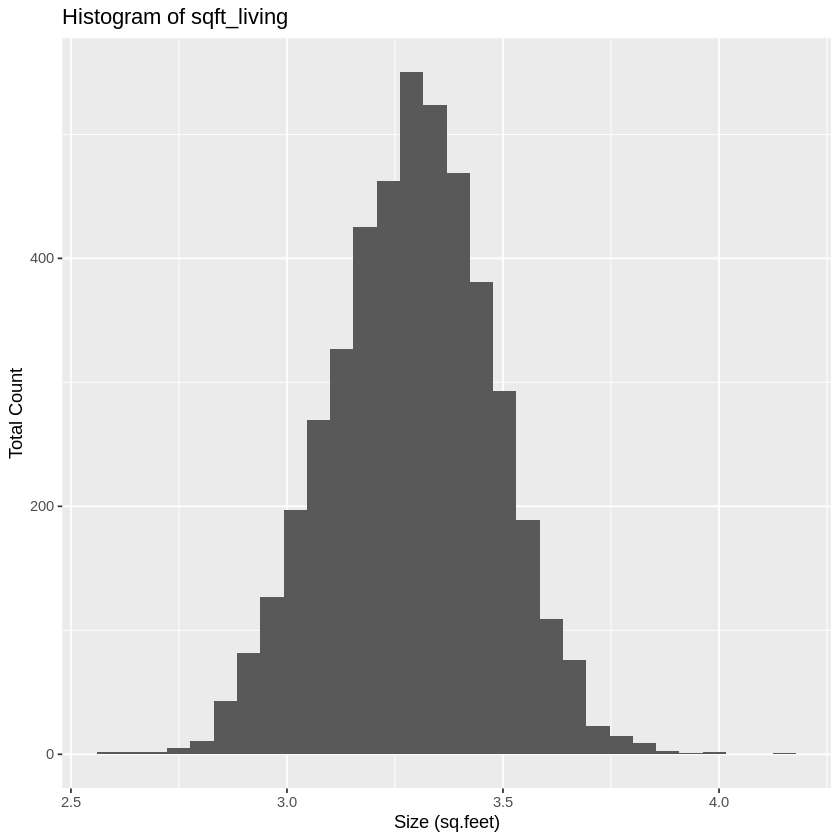

In [9]:
# Create a new feature log_price
house_prices <- house_prices %>%
  mutate(log_sqrf_living = log10(sqft_living))

# Plot Histogram of prices
ggplot(house_prices, aes(x= log_sqrf_living))+
  geom_histogram() + 
  labs(x='Size (sq.feet)', y= 'Total Count', title='Histogram of sqft_living')

## Scatter plot sqft_living, price, color=waterfront

---



`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 49 rows containing non-finite values (stat_smooth).”


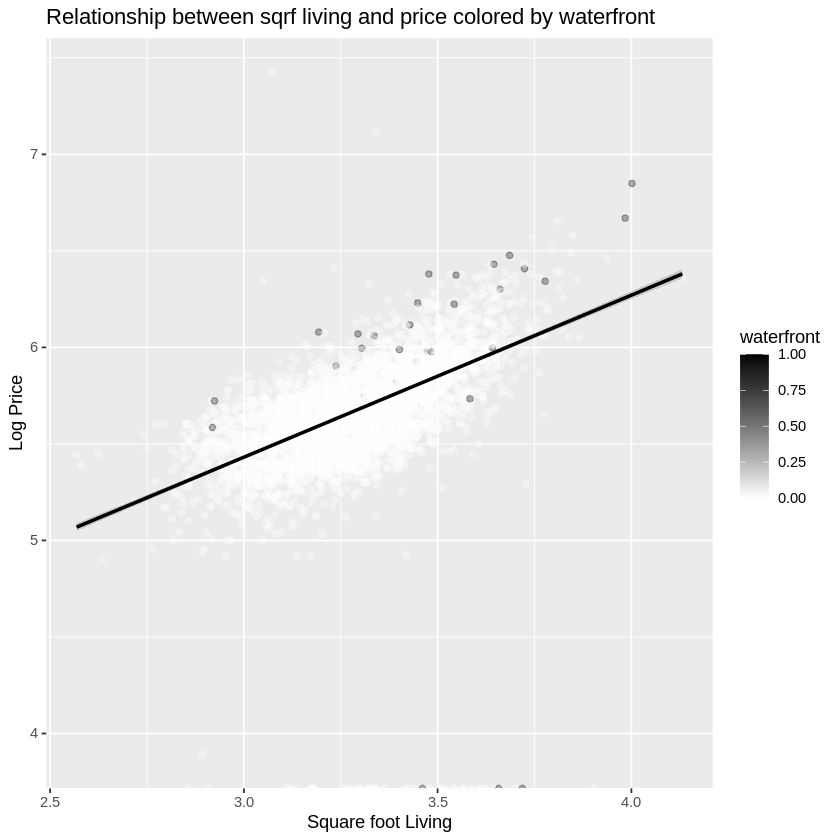

In [36]:
# Plot Scatter
ggplot(house_prices, aes(x = log_sqrf_living, y = log_price, color=waterfront)) +
  geom_point(alpha=0.3) + 
  scale_color_gradient2(low="white", high="black", space ="Lab" ) +
  labs(x='Square foot Living', y= 'Log Price', title= 'Relationship between sqrf living and price colored by waterfront') + 
  geom_smooth(method='lm', color='Black')

It seem there is a good correlation between square foot and price. 

As we color the points of properties that have waterfront, wee see that they position at the upper lever of all points. If we consider filtering by waterfront we would end having to models ax + b = y where b would be higher for waterfron 1 and a(slope) might be quite similar.

## Value inconsistency. Some prices == 0 

One important reason to perform EDA is to detect any potential outliers that are likely data entry errors.

Scatter plot shows price values of 0. 

In [64]:
summary(house_prices)

     date               price             bedrooms       bathrooms    
 Length:4550        Min.   :   80000   Min.   :0.000   Min.   :0.000  
 Class :character   1st Qu.:  326446   1st Qu.:3.000   1st Qu.:1.750  
 Mode  :character   Median :  465000   Median :3.000   Median :2.250  
                    Mean   :  558027   Mean   :3.395   Mean   :2.155  
                    3rd Qu.:  657500   3rd Qu.:4.000   3rd Qu.:2.500  
                    Max.   :26590000   Max.   :9.000   Max.   :8.000  
  sqft_living       sqft_lot           floors        waterfront      
 Min.   :  370   Min.   :    638   Min.   :1.000   Min.   :0.000000  
 1st Qu.: 1460   1st Qu.:   5000   1st Qu.:1.000   1st Qu.:0.000000  
 Median : 1970   Median :   7680   Median :1.500   Median :0.000000  
 Mean   : 2133   Mean   :  14835   Mean   :1.512   Mean   :0.006593  
 3rd Qu.: 2610   3rd Qu.:  10968   3rd Qu.:2.000   3rd Qu.:0.000000  
 Max.   :13540   Max.   :1074218   Max.   :3.500   Max.   :1.000000  
      view   

In [44]:
house_prices %>%
  filter(price==0) %>%
  count()

n
<int>
49


There are 49 observations with value inconsistency.

I'll filter for all prices to be higher than 20k.

### Clean prices == 0

In [57]:
# Remove all 0 value prices
house_prices <- house_prices %>% 
  filter(price > 20000)

## Fit Linear model and regression table

In [13]:
install.packages("moderndive")
library(moderndive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
houses_water <- house_prices %>%
  filter(waterfront==1)

# lm formula lm(y ~ x, data)
model_water <- lm(log_price ~ log_sqrf_living, data=houses_water)

get_regression_table(model_water)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,2.631,0.488,5.394,0,1.632,3.631
log_sqrf_living,0.998,0.141,7.096,0,0.710,1.286


## BoxPlot of waterfront and price

,waterfront,median_of_price,observations
,<int>,<dbl>,<int>
1,0,464000,4520
2,1,1072500,30


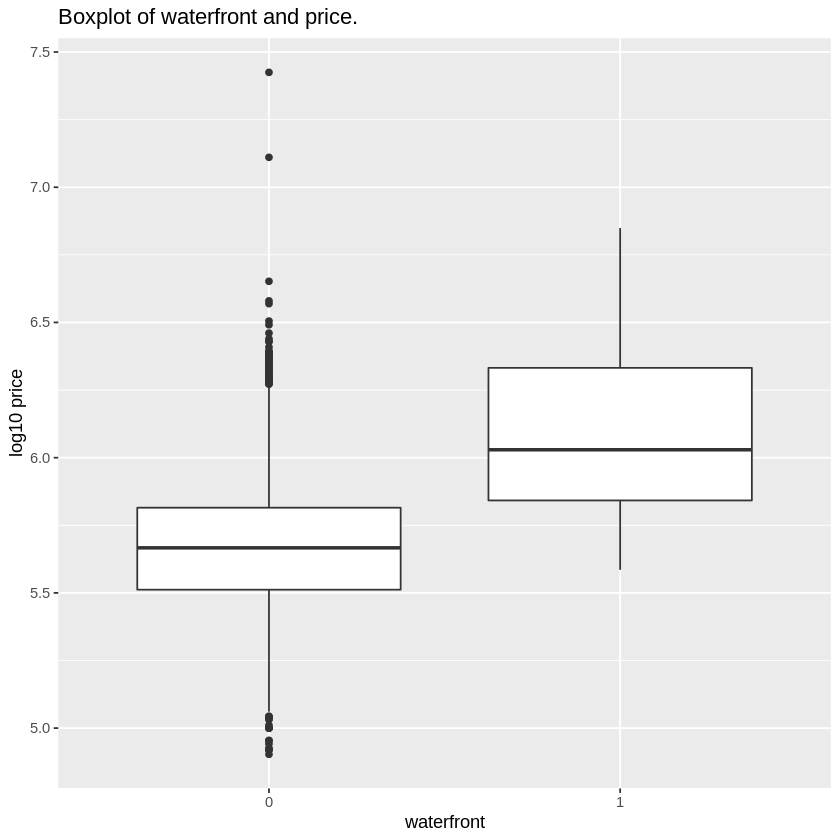

In [63]:
# View the structure of log10_price and waterfront
house_prices %>%
  group_by(waterfront) %>%
  summarize(median_of_price = median(price), observations = n())

# Plot 
ggplot(house_prices, aes(x = factor(waterfront), y = log_price)) +
  geom_boxplot() +
  labs(x = "waterfront", y = "log10 price", title='Boxplot of waterfront and price.')

As we saw in scatterplot, even tough we only 33 waterfront houses, it seems these are expected to have higher sale price.

Most houses don't have a view of the waterfront

## Correlation between SQFT living and price

In [59]:
# Correlation?
house_prices %>%
  summarize(correlation = cor(log_sqrf_living, price))

correlation
<dbl>
0.3896796


## Scatter n bedrooms and log_price

`geom_smooth()` using formula 'y ~ x'



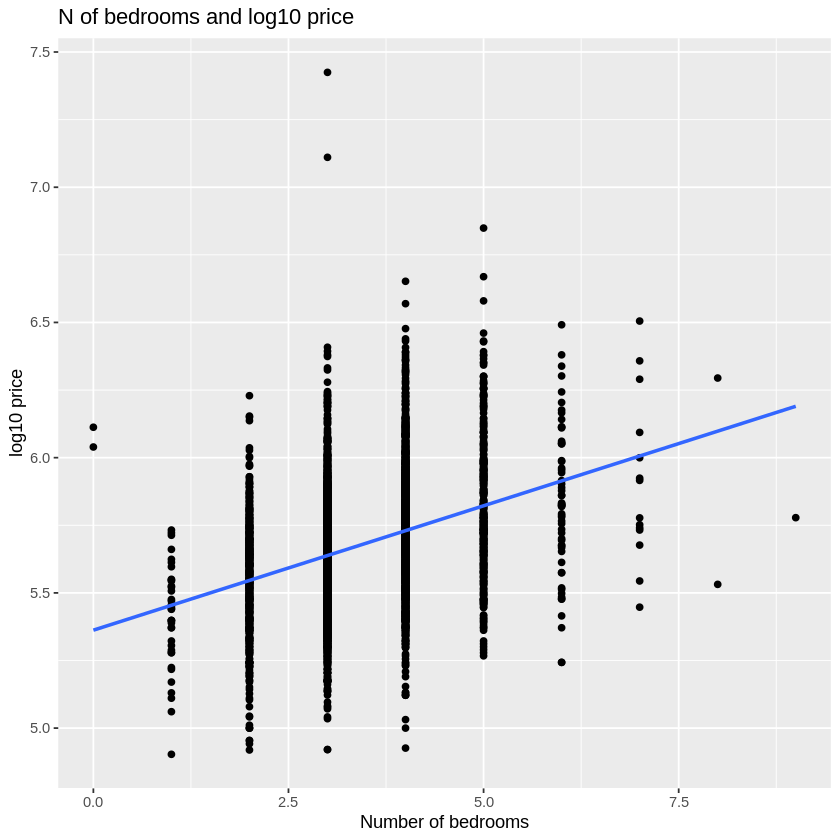

In [60]:
# Create scatterplot with regression line
ggplot(house_prices, aes(x = bedrooms, y = log_price)) +
  geom_point() +
  labs(x = "Number of bedrooms", y = "log10 price", title= "N of bedrooms and log10 price") +
  geom_smooth(method = "lm", se = FALSE)

# Linear model of target price as a function of sqrft living and bedrooms.

*   Elemento de la lista
*   Elemento de la lista



In [69]:
# Fit model
model_price_1 <- lm(log_price ~ log_sqrf_living + bedrooms, 
                    data = house_prices)

# Get regression table
get_regression_table(model_price_1)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,2.710,0.052,51.778,0,2.607,2.812
log_sqrf_living,0.934,0.018,51.631,0,0.898,0.969
bedrooms,-0.031,0.004,-8.442,0,-0.039,-0.024


The model  can be written as y= a1x1 + a2x2 + b

a2 is -0.031, but it doesn't mean that every extra bedroom is associated with a decrease of on average 0.033 in log_price. We have to analyze the complete model having log_sqrf_living in mind.

### Sum squared errors

In [70]:
# Sum of squared errors of the model
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(sum_sq_residuals = sum(sq_residuals))

sum_sq_residuals
<dbl>
137.5454


# Linear model of target price as a function of sqrft living and waterfront.


In [89]:
# Fit model
model_price_2 <- lm(log_price ~ log_sqrf_living + waterfront, 
                    data = house_prices)

# Get regression table
get_regression_table(model_price_2)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,2.953,0.046,64.519,0,2.863,3.043
log_sqrf_living,0.827,0.014,59.494,0,0.800,0.854
waterfront,0.271,0.032,8.469,0,0.208,0.333


`geom_smooth()` using formula 'y ~ x'



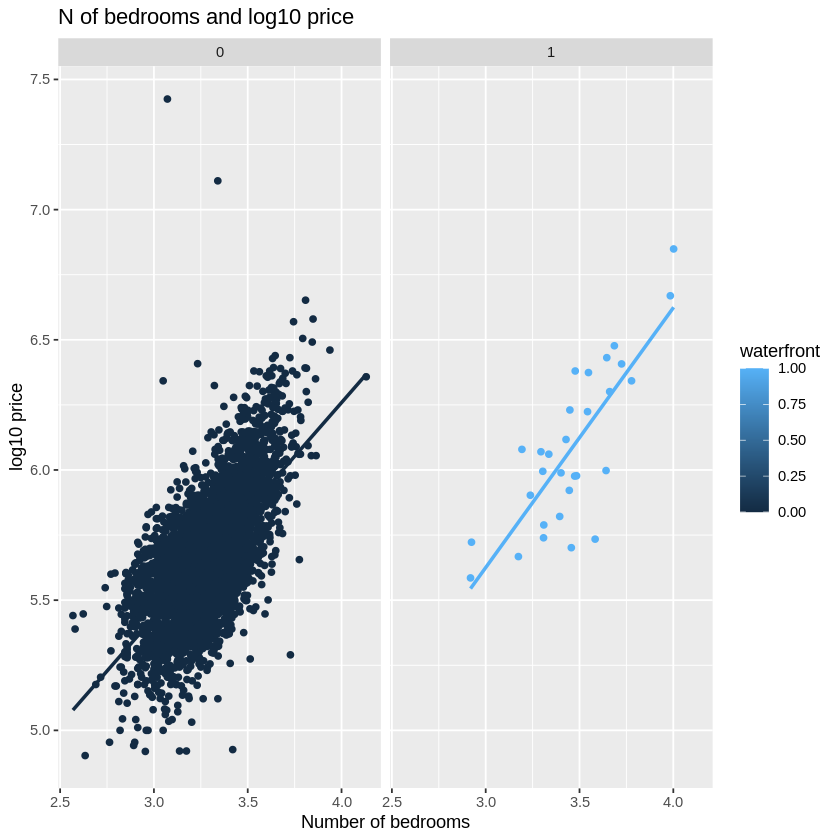

In [84]:
# Create scatterplot with regression line
ggplot(house_prices, aes(x = log_sqrf_living, y = log_price, color=waterfront)) +
  geom_point() +
  facet_wrap(house_prices$waterfront) + 
  labs(x = "Number of bedrooms", y = "log10 price", title= "N of bedrooms and log10 price") +
  geom_smooth(method = "lm", se = FALSE)

## Predict on new houses

Create first a new data frame with 2 new houses.

In [97]:
# use tibble now insted of data_frame() to create a new data frame
new_houses <- tibble(
  log_sqrf_living = c(2.9, 3.6),
  waterfront = c(1,0)
)

new_houses

log_sqrf_living,waterfront
<dbl>,<dbl>
2.9,1
3.6,0


In [99]:
# Get predictions on "new" houses
get_regression_points(model_price_2, newdata = new_houses) %>%
  mutate(price = 10^log_price_hat)

ID,log_sqrf_living,waterfront,log_price_hat,price
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.9,1,5.621,417830.4
2,3.6,0,5.930,851138.0


# Assesing models

## R2 

Matematically R2 is 1- (var(residuals)/var(y))

R2 is between 0 and 1.

**R2 means the proportion of the total variation in outcome variable "y" that the model explains.**

In [105]:
# R2 for model 1
get_regression_points(model_price_1) %>%
  summarize(r_squared = 1 - var(residual) / var(log_price)) 

r_squared
<dbl>
0.4491066


This means 45% of total variation of the variable 'y' is explained by the model. 

In [104]:
# R2 for model 2
get_regression_points(model_price_2) %>%
  summarize(r_squared = 1 - var(residual) / var(log_price))

r_squared
<dbl>
0.4491414


Both models are pretty similar in terms of R2.

## MSE (for train)

In [112]:
# MSE
get_regression_points(model_price_2) %>%
  mutate(sq_residual = residual^2) %>%
  summarize(mse = mean(sq_residual))

mse
<dbl>
0.03022785


## RMSE (train)

In [116]:
# MSE
get_regression_points(model_price_2) %>%
  mutate(sq_residual = residual^2) %>%
  summarize(mse = mean(sq_residual)) %>%
  mutate(rmse = sqrt(mse))

# or 
# MSE
get_regression_points(model_price_2) %>%
  mutate(sq_residual = residual^2) %>%
  summarize(mse = mean(sq_residual), rmse = sqrt(mean(sq_residual))) 


mse,rmse
<dbl>,<dbl>
0.03022785,0.1738616


mse,rmse
<dbl>,<dbl>
0.03022785,0.1738616


# Train/test split 


## Randomly Shuffle dataset

In [117]:
# Use sample_frac from dplyr library for randomly shuffle data set
house_prices_shuffled <- house_prices %>%
  sample_frac(size=1, replace= FALSE)

## Split train-test with slice.

House prices has 4550 observations.

In [119]:
str(house_prices_shuffled)

'data.frame':	4550 obs. of  20 variables:
 $ date           : chr  "2014-06-27 00:00:00" "2014-05-05 00:00:00" "2014-06-21 00:00:00" "2014-05-30 00:00:00" ...
 $ price          : num  295000 117833 849000 280000 819900 ...
 $ bedrooms       : num  1 3 4 2 5 4 4 3 3 5 ...
 $ bathrooms      : num  1 1 2 1 2.75 1.75 2.5 1.5 1 5.25 ...
 $ sqft_living    : int  700 1340 2160 1880 3150 1950 2800 1430 1490 4830 ...
 $ sqft_lot       : int  2500 306848 6300 7560 7119 13320 8494 8960 8995 18707 ...
 $ floors         : num  1 1 1.5 1 2 1 2 1 1 2 ...
 $ waterfront     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view           : int  0 0 1 0 0 0 0 0 0 1 ...
 $ condition      : int  4 3 4 3 3 4 3 4 4 5 ...
 $ sqft_above     : int  700 1340 2160 940 3150 1370 2800 1430 1490 3930 ...
 $ sqft_basement  : int  0 0 0 940 0 580 0 0 0 900 ...
 $ yr_built       : int  1907 1953 1928 1919 2013 1969 2004 1953 1954 1952 ...
 $ yr_renovated   : int  0 0 0 2001 1923 0 2003 1983 1979 1998 ...
 $ street         : chr  "410

In [125]:
# Split into train and test 80% / 20%
train <- house_prices_shuffled %>%
  slice(1:(4550*.8))

test <- house_prices_shuffled %>%
  slice((4550*.8+1):4550)

In [133]:
# Fit model to training set
train_model_3 <- lm(log_price ~ log_sqrf_living + bedrooms + waterfront, data = train)

# Make predictions on test set
get_regression_points(train_model_3, newdata = test)

ID,log_price,log_sqrf_living,bedrooms,waterfront,log_price_hat,residual
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,6.085,3.582,4,0,5.926,0.159
2,5.778,3.279,3,0,5.675,0.103
3,5.204,3.083,3,0,5.493,-0.289
4,6.243,3.545,6,0,5.833,0.410
5,6.569,3.744,4,0,6.076,0.493
6,5.923,3.431,4,0,5.786,0.137
7,5.613,3.167,3,0,5.572,0.041
8,5.799,3.233,3,0,5.632,0.167
9,5.869,3.435,4,0,5.789,0.079


In [138]:
# Compute RMSE
get_regression_points(train_model_3, newdata = test) %>% 
  mutate(sq_residuals = residual^2) %>%
  summarize(rmse = sqrt(mean(sq_residuals))) 

rmse
<dbl>
0.1685948
